# Import libraries

In [56]:
from utils import generate_samples_linear_reg
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import scipy.stats as stats

# Generate sample

In [41]:
samples = 100
features = 1
lower_bound = 0
upper_bound = 10
intercept = 5
coeffecients = [10]
sigma = 10

X, y = generate_samples_linear_reg(
    samples,
    features,
    lower_bound,
    upper_bound,
    intercept,
    coeffecients,
    sigma
)

print("Shape of samples is: ",X.shape)
print("Samples are: ", X)

print("\n Shape of labels is: ",y.shape)
print("Labels are: ", y)



Shape of samples is:  (100, 1)
Samples are:  [[8.23094743]
 [7.22920968]
 [6.35957514]
 [4.86140803]
 [7.00022976]
 [4.81601105]
 [7.89594322]
 [7.71868096]
 [1.51415592]
 [9.96240691]
 [0.56621444]
 [4.72014117]
 [2.86367604]
 [3.78269099]
 [2.29858872]
 [7.69355003]
 [2.65365268]
 [7.70362705]
 [9.84211494]
 [9.9805144 ]
 [0.30674227]
 [4.20548746]
 [5.62809239]
 [6.28580687]
 [8.74011944]
 [2.62476289]
 [6.36595024]
 [8.36017742]
 [2.89915366]
 [1.6060777 ]
 [3.01163452]
 [3.98666178]
 [8.6304298 ]
 [0.79885227]
 [5.12330392]
 [8.82864738]
 [0.12554816]
 [5.66873901]
 [8.99157992]
 [0.50262455]
 [3.18092061]
 [0.02901829]
 [5.48655732]
 [3.16123733]
 [0.34137999]
 [6.35366214]
 [8.76068626]
 [4.88038928]
 [3.84825866]
 [6.83927276]
 [1.08069845]
 [3.12623013]
 [0.98663845]
 [4.5384433 ]
 [8.90224499]
 [2.0219244 ]
 [6.97807893]
 [5.41497103]
 [2.54636935]
 [1.51765334]
 [3.75441504]
 [8.90426919]
 [4.9024553 ]
 [4.1424233 ]
 [8.720358  ]
 [3.63208011]
 [4.61519663]
 [0.64283295]
 [3

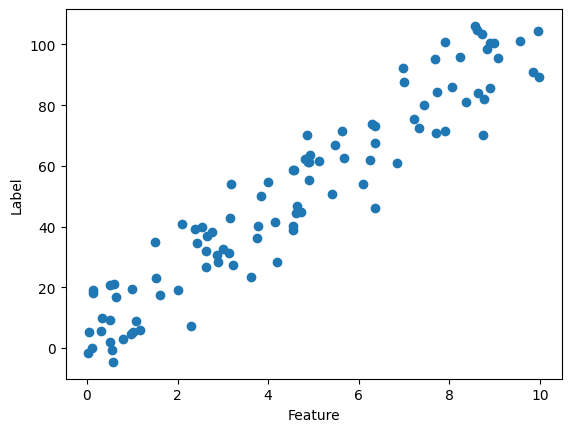

In [42]:
# Plot of samples

plt.scatter(X,y)
plt.xlabel("Feature")
plt.ylabel("Label")
plt.show()


# Train model

In [43]:
# Train linear regression model

X_with_intercept = sm.add_constant(X)
model = sm.OLS(y,X_with_intercept)
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     909.4
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           2.19e-51
Time:                        00:28:57   Log-Likelihood:                -369.64
No. Observations:                 100   AIC:                             743.3
Df Residuals:                      98   BIC:                             748.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6333      1.812      2.557      0.012       1.037       8.229
x1            10.0158      0.332     30.156      0.000       9.357      10.675
==============================================================================
Omnibus:                        5.401   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                2.759
Skew:                          -0.132   Prob(JB):                        0.252
Kurtosis:                       2.230   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Prediction

In [44]:
# Predictions

y_pred = model_results.predict(X_with_intercept)


# Error plots

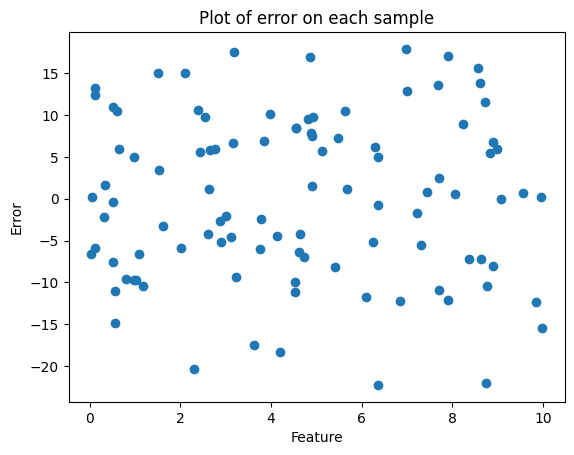

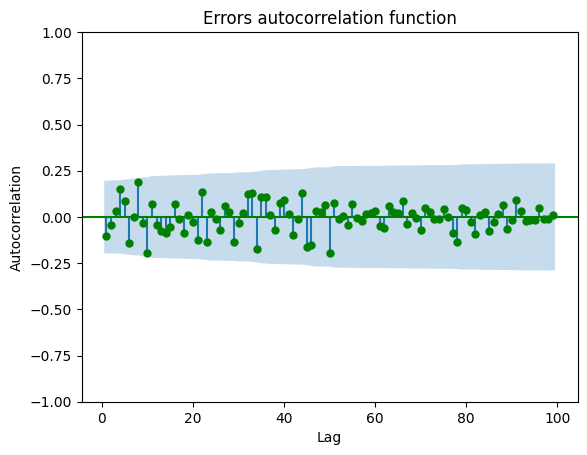

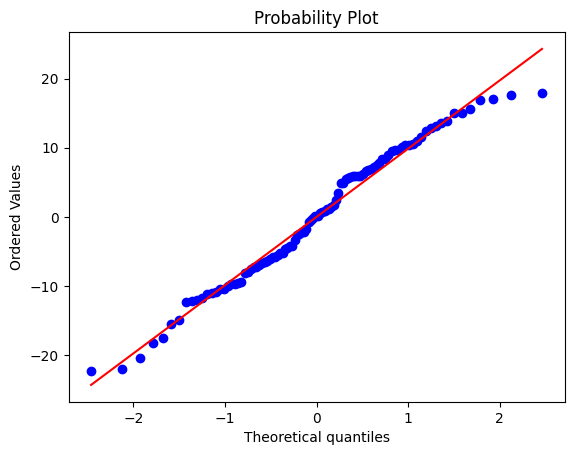

In [58]:
# Plot of errors

errors = y-y_pred

plt.scatter(X,errors)
plt.xlabel("Feature")
plt.ylabel("Error")
plt.title("Plot of error on each sample")
plt.show()

# tsaplots.plot_acf(errors, color='g', lags=np.arange(1,len(errors)),title='Errors autocorrelation function')
tsaplots.plot_acf(errors, color='g', lags=np.arange(1,100),title='Errors autocorrelation function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

stats.probplot(errors, dist="norm", plot=plt)
plt.show() 
